In [19]:
import numpy
import numpy.linalg as la
from numpy import random
import itertools
from N_Level_Engine_v1 import*
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [20]:
#Write function to generate correlation matrix
def correlation_matrix(N):
    corr_matrix = np.identity(N)
    angles = []
    for i in range(N-1):
        corr_matrix[0,i+1] = np.cos(2*np.pi*(random.uniform()))
    for i in range(0,N):
        for j in range(i+1, N):
            corr_matrix[i,j] = corr_matrix[0,i]*corr_matrix[0,j]+np.sqrt((1-corr_matrix[0,i]**2)*(1-corr_matrix[0,j]**2))
            corr_matrix[j,i] = corr_matrix[i,j]
    return(corr_matrix)

In [1]:
#Write function to generate special correlation matrix
def generate_all_special_correlation_matrices(N):
    alignment = [1,-1]
    all_possible_sequences = list(itertools.product(alignment, repeat=N-1))
    pmatrices = []
    for i in range(2**(N-1)):
        pmatrix = np.identity(N)
        for j in range(N-1):
            pmatrix[0,j+1] = all_possible_sequences[i][j]
            pmatrix[j+1,0] = pmatrix[0,j+1]
        for k in range(1,N):
            for l in range(k+1, N):
                if pmatrix[0,k] == pmatrix[0,l]:
                    pmatrix[k,l] = 1
                else:
                    pmatrix[k,l] = -1
                pmatrix[l,k] = pmatrix[k,l]
        pmatrices.append(pmatrix)
    return pmatrices

In [37]:
#Write function to calculate correlation strength as represented by l-1 norm:
def corr_strength(pmatrix):
    strength = 0
    N = len(pmatrix)
    for i in range(N):
        for j in range(i+1, N):
            strength+=abs(pmatrix[i,j])
    return 2*strength/(N*(N-1))

(array([ 110.,  582., 2289., 2971., 1116.,  931.,  747.,  594.,  426.,
         234.]),
 array([0.37026625, 0.43315901, 0.49605178, 0.55894455, 0.62183731,
        0.68473008, 0.74762284, 0.81051561, 0.87340838, 0.93630114,
        0.99919391]),
 <BarContainer object of 10 artists>)

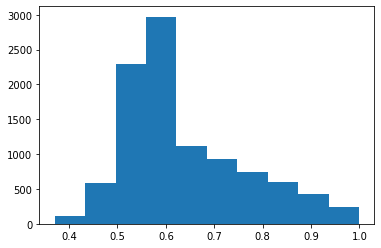

In [81]:
n = 10000
data = []
for i in range(n):
    data.append(corr_strength(correlation_matrix(4)))
plt.hist(data)

1.0

# N= 2

## Engine

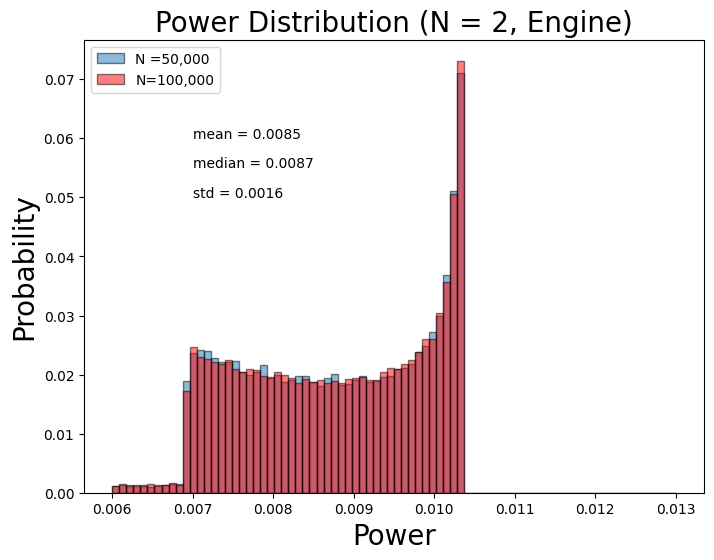

In [95]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    random_p1 = random.uniform(-1,1)
    p_matrix1 = np.array([[0,random_p1],[random_p1, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,p_matrix1,0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    random_p2 = random.uniform(-1,1)
    p_matrix2 = np.array([[0,random_p2],[random_p2, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,p_matrix2,0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend(loc = 'upper left')
plt.text(0.007, 0.06, s = 'mean = {0}'.format(round(np.mean(power_data), 4)), size = 10)
plt.text(0.007, 0.055, s = 'median = {0}'.format(round(np.median(power_data),4)), size= 10)
plt.text(0.007, 0.05, s = 'std = {0}'.format(round(np.std(power_data),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title("Power Distribution (N = 2, Engine)", size =20)
plt.savefig('powerDistEngine_N=2.png', dpi=100)

## Refrigerator

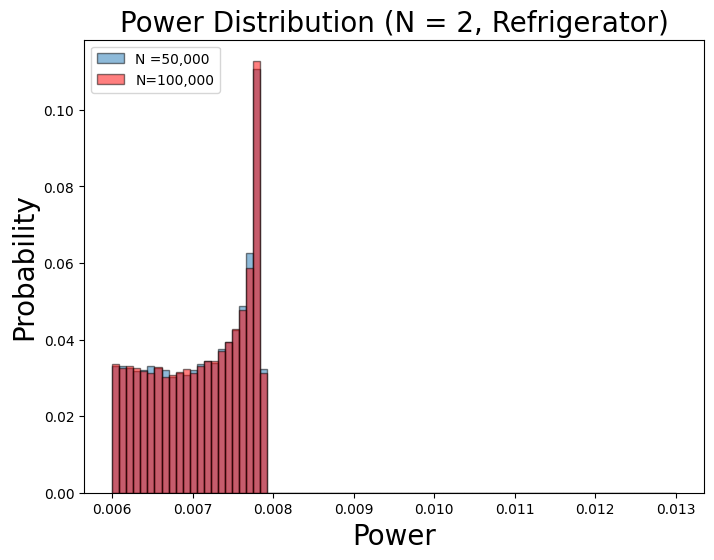

In [91]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    random_p1 = random.uniform(-1,1)
    p_matrix1 = np.array([[0,random_p1],[random_p1, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,1.5,p_matrix1,0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    random_p2 = random.uniform(-1,1)
    p_matrix2 = np.array([[0,random_p2],[random_p2, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,1.5,p_matrix2,0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend(loc = 'upper left')
#plt.text(0.1, 0.9, s = 'mean = {0}'.format(round(np.mean(power_data), 4)),transform=ax.transAxes, size = 30)
#plt.text(0.1, 0.8, s = 'median = {0}'.format(round(np.median(power_data),4)),transform=ax.transAxes, size= 30)
#plt.text(0.1, 0.7, s = 'std = {0}'.format(round(np.std(power_data),4)),transform=ax.transAxes, size = 30)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title("Power Distribution (N = 2, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=2.png', dpi=100)

# N= 3

## Engine

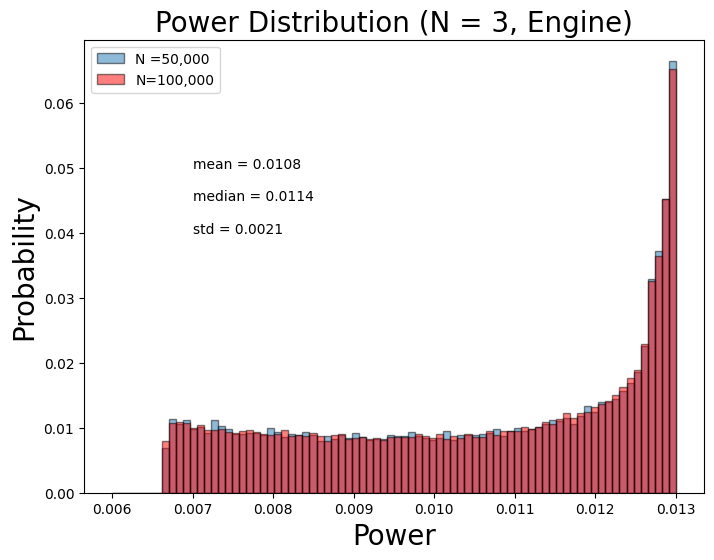

In [8]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 3, Engine)", size =20)
plt.savefig('powerDistEngine_N=3.png', dpi=100)

In [8]:
special_correlation_matrices = generate_all_special_correlation_matrices(3)
power_list = [powerSS(getSteadyState(5,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
print(power_list)

[0.006645000114250942, 0.012624770090756278, 0.012624770090756274, 0.012624770090756276]


In [18]:
pmatrix = np.array([[1,-1,-1],[-1,1,1],[-1,1,1]])
ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)
powerSS(ss, 1,3,0,0.05)

0.012624770090756276

NameError: name 'ax' is not defined

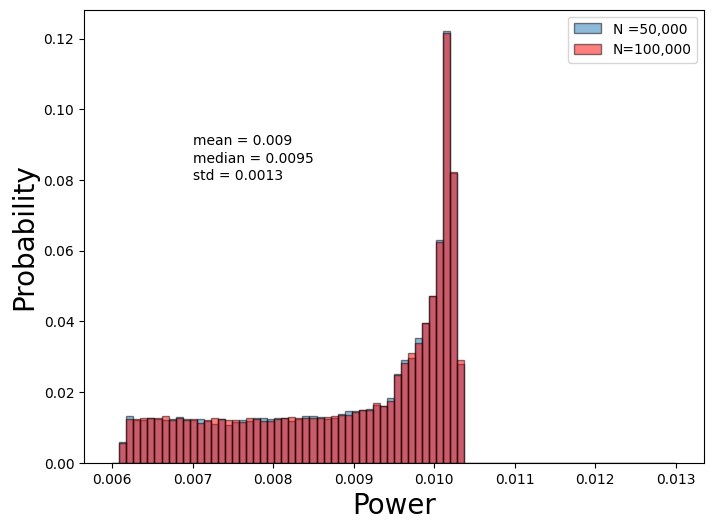

In [7]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(5,1,3,0.1,0.1,2,1.5,correlation_matrix(3),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(5,1,3,0.1,0.1,2,1.5,correlation_matrix(3),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.09, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.085, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.08, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 3, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=3.png', dpi=100)

# N = 4 

## Engine

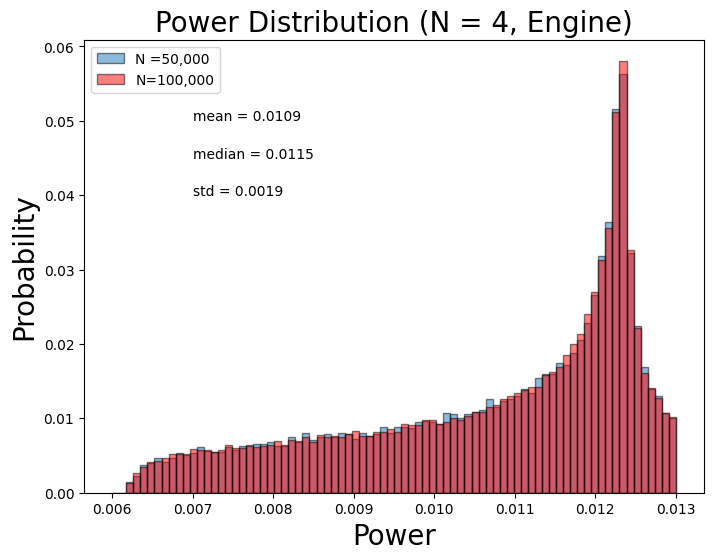

In [9]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(6,1,3,0.1,0.1,2,0.2,correlation_matrix(4),0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    ss = getSteadyState(6,1,3,0.1,0.1,2,0.2,correlation_matrix(4),0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 4, Engine)", size =20)
plt.savefig('powerDistEngine_N=4.png', dpi=100)

## Refrigerator

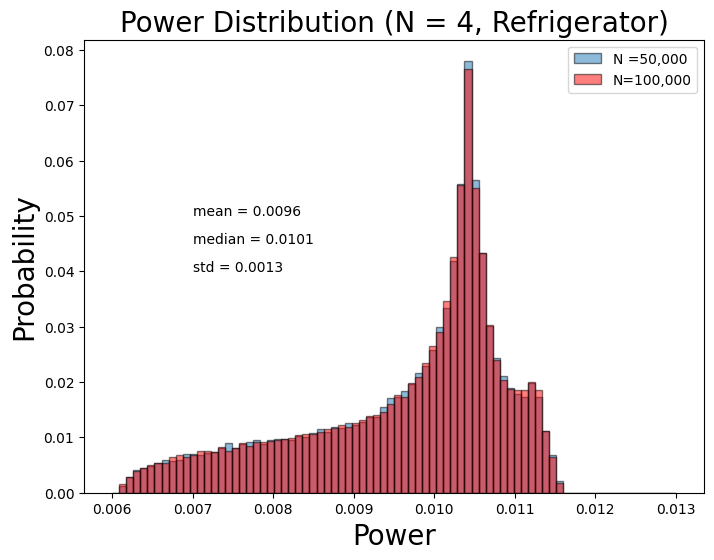

In [11]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(6,1,3,0.1,0.1,2,1.5,correlation_matrix(4),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(6,1,3,0.1,0.1,2,1.5,correlation_matrix(4),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 4, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=4.png', dpi=100)

# N = 5

## Refrigerator

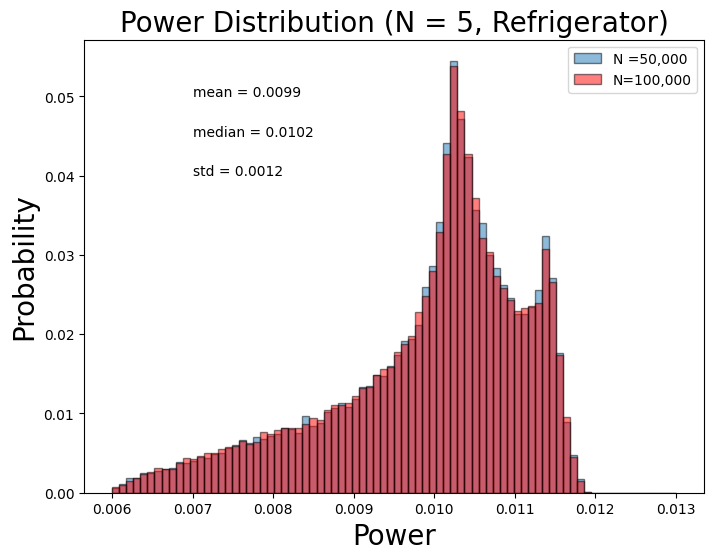

In [12]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(7,1,3,0.1,0.1,2,1.5,correlation_matrix(5),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(7,1,3,0.1,0.1,2,1.5,correlation_matrix(5),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 5, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=5.png', dpi=100)

In [66]:
special_correlation_matrices = generate_all_special_correlation_matrices(5)
power_list = [powerSS(getSteadyState(7,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(7,1,3,0.1,0.1,2,0.2, np.identity(5), 0,0,0.05), 1,3,0,0.05)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.012740162831532542
[[ 1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1. -1.  1.  1.]]
0.012740162831532542
[[ 1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.]
 [ 1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.]]
0.012740162831532537
[[ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1.]]
0.012740162831532537
[[ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]]
0.012740162831532531
[[ 1. -1.  1.  1. -1.]
 [-1.  1. -1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1. -1.]
 [-1.  1. -1. -1.  1.]]
0.012740162831532533
[[ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]]
0.012740162831532535
[[ 1. -1.  1. -1. -1.]
 [-1.  1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1. -1.  1.  1.]]
0.01274016283153253
[[ 1. -1. -1.  1.  1.

In [72]:
special_correlation_matrices = generate_all_special_correlation_matrices(3)
power_list = [powerSS(getSteadyState(5,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(5,1,3,0.1,0.1,2,0.2, np.identity(3), 0,0,0.05), 1,3,0,0.05)
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.011231718028491135
0.012624770090756278
[[ 1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]]
0.012624770090756274
[[ 1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1.  1.]]
0.012624770090756276
[[ 1. -1. -1.]
 [-1.  1.  1.]
 [-1.  1.  1.]]


In [71]:
special_correlation_matrices = generate_all_special_correlation_matrices(4)
power_list = [powerSS(getSteadyState(6,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(6,1,3,0.1,0.1,2,0.2, np.identity(4), 0,0,0.05), 1,3,0,0.05)
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.01200118707109208
0.013331174118574702
[[ 1.  1. -1. -1.]
 [ 1.  1. -1. -1.]
 [-1. -1.  1.  1.]
 [-1. -1.  1.  1.]]
0.013331174118574696
[[ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
0.01333117411857468
[[ 1. -1. -1.  1.]
 [-1.  1.  1. -1.]
 [-1.  1.  1. -1.]
 [ 1. -1. -1.  1.]]


In [73]:
special_correlation_matrices = generate_all_special_correlation_matrices(5)
power_list = [powerSS(getSteadyState(7,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(7,1,3,0.1,0.1,2,0.2, np.identity(5), 0,0,0.05), 1,3,0,0.05)
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.012296384137042402
0.012740162831532542
[[ 1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1. -1.  1.  1.]]
0.012740162831532542
[[ 1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.]
 [ 1.  1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.]]
0.012740162831532537
[[ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1.]]
0.012740162831532537
[[ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]]
0.012740162831532531
[[ 1. -1.  1.  1. -1.]
 [-1.  1. -1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1. -1.]
 [-1.  1. -1. -1.  1.]]
0.012740162831532533
[[ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]]
0.012740162831532535
[[ 1. -1.  1. -1. -1.]
 [-1.  1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1. -1.  1.  1.]]
0.01274016283153253


In [74]:
special_correlation_matrices = generate_all_special_correlation_matrices(6)
power_list = [powerSS(getSteadyState(8,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(8,1,3,0.1,0.1,2,0.2, np.identity(6), 0,0,0.05), 1,3,0,0.05)
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.012318546804968107
0.012562326722185076
[[ 1.  1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]]
0.012562326722185095
[[ 1.  1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.  1.]
 [ 1.  1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.  1.]
 [-1. -1.  1. -1.  1.  1.]]
0.01256232672218508
[[ 1.  1. -1. -1.  1. -1.]
 [ 1.  1. -1. -1.  1. -1.]
 [-1. -1.  1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.  1.]
 [ 1.  1. -1. -1.  1. -1.]
 [-1. -1.  1.  1. -1.  1.]]
0.012562326722185099
[[ 1.  1. -1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.  1.]
 [-1. -1.  1.  1.  1. -1.]
 [-1. -1.  1.  1.  1. -1.]
 [-1. -1.  1.  1.  1. -1.]
 [ 1.  1. -1. -1. -1.  1.]]
0.012562326722185088
[[ 1. -1.  1.  1. -1. -1.]
 [-1.  1. -1. -1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1.]
 [-1.  1. -1. -1.  1.  1.]
 [-1.  1. -1. -1.  1.  1.]]
0.012562326722185086
[[ 1. -1.  1. -1.  1. -1.]
 [-1.  1. -1

In [75]:
special_correlation_matrices = generate_all_special_correlation_matrices(7)
power_list = [powerSS(getSteadyState(9,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
pref=powerSS(getSteadyState(9,1,3,0.1,0.1,2,0.2, np.identity(7), 0,0,0.05), 1,3,0,0.05)
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])

0.012181521184075722


(array([ 1.,  0.,  0.,  0.,  8.,  0.,  0., 28.,  0., 91.]),
 array([0.00458683, 0.00528392, 0.00598101, 0.0066781 , 0.00737519,
        0.00807228, 0.00876937, 0.00946646, 0.01016355, 0.01086064,
        0.01155773]),
 <BarContainer object of 10 artists>)

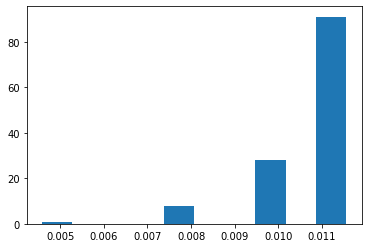

In [13]:
special_correlation_matrices = generate_all_special_correlation_matrices(8)
power_list = [powerSS(getSteadyState(10,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
plt.hist(power_list)

(array([  1.,   0.,   0.,  10.,   0.,   0.,  45.,   0., 120., 336.]),
 array([0.00402762, 0.00468449, 0.00534136, 0.00599823, 0.00665509,
        0.00731196, 0.00796883, 0.0086257 , 0.00928257, 0.00993944,
        0.01059631]),
 <BarContainer object of 10 artists>)

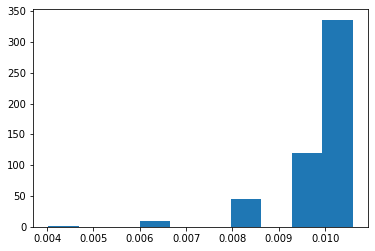

In [14]:
special_correlation_matrices = generate_all_special_correlation_matrices(10)
power_list = [powerSS(getSteadyState(12,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
plt.hist(power_list)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 6.600e+01,
        0.000e+00, 2.200e+02, 4.950e+02, 1.254e+03]),
 array([0.00358395, 0.00419938, 0.0048148 , 0.00543023, 0.00604565,
        0.00666108, 0.0072765 , 0.00789192, 0.00850735, 0.00912277,
        0.0097382 ]),
 <BarContainer object of 10 artists>)

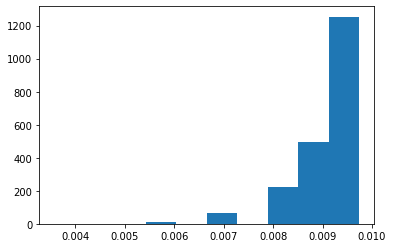

In [15]:
special_correlation_matrices = generate_all_special_correlation_matrices(12)
power_list = [powerSS(getSteadyState(14,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
plt.hist(power_list)

In [53]:
powerSS(getSteadyState(14,1,3,0.1,0.1,2,0.2, np.identity(12), 0,0,0.05), 1,3,0,0.05)

0.010720535761196224

In [79]:
special_correlation_matrices = generate_all_special_correlation_matrices(5)
power_list = [abs(powerSS(getSteadyState(7,1,3,0.1,0.1,2,1.5, pmatrix, 0,0,0.05), 1,3,0,0.05)) for pmatrix in special_correlation_matrices]
pref=abs(powerSS(getSteadyState(7,1,3,0.1,0.1,2,1.5, np.identity(5), 0,0,0.05), 1,3,0,0.05))
print(pref)
for i in range(len(power_list)):
    if power_list[i] > pref:
        print(power_list[i])
        print(special_correlation_matrices[i])
print(power_list)

0.012071604053884584
[0.005914797051757923, 0.00887441256448405, 0.008874412564484055, 0.010122408641094665, 0.008874412564484046, 0.010122408641094642, 0.010122408641094654, 0.010122408641094672, 0.00887441256448406, 0.010122408641094646, 0.010122408641094661, 0.010122408641094639, 0.010122408641094647, 0.01012240864109462, 0.010122408641094635, 0.008874412564484062]
